# 확률적 경사 하강법


## SGDClassifirer

In [2]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.info()
fish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [3]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish["Species"].to_numpy()

In [5]:
#훈련, 테스트 셋 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

In [6]:
#훈련, 테스트 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
#사이킷런에서 확률적 경사 하강법 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier

#SGDClassifier의 객체를 만들 때 2개의 매개 변수 지정
#loss - 손실함수의 종류 , max_iter - 수행할 에포크 횟수 
#The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent. 버전 업그레이드 되서 log_loss 쓰기
sc = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
#점진적 학습하기 
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))
#partial_fit - 1에포크씩 이어서 훈련 가능

0.8151260504201681
0.85


### 조기종료(early stopping)
- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가
- 테스트 세트 점수는 어느 순간 감소 = 과대적합되기 시작하는 곳
- 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료라고 함

In [10]:
import numpy as np
sc = SGDClassifier('log_loss',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [11]:
#300번의 에포크 동안 훈련을 반복 진행
#반복마다 훈련세트와 테스트 세트의 점수 계산해서 리스트에 추가
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #partial_fit 메서드는 데이터의 일부를 사용
    #따라서 전체 데이터의 클래스를 알 수 없기 때문에 클래스를 따로 전달해 주어야 함
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

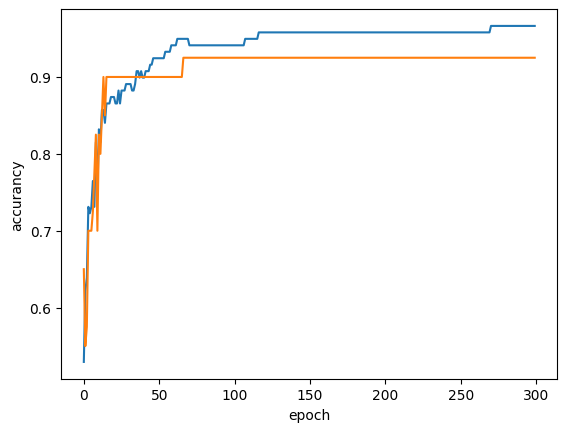

In [12]:
#300번의 에포크 동안 기록한 훈련/테스트 점수 그래프
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accurancy")
plt.show()
#100번째 에포크 이후 두 세트 점수의 차이가 점점 벌어짐

In [20]:
#에포크를 100에 맞추어 모델 훈련
sc= SGDClassifier('log_loss', max_iter=100,tol=None,random_state=42)
#일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
#tol의 매개변수를 none으로 지정하여 자동으로 멈추지 않고 100만큼 실행하도록 함
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


### loss의 매개 변수중 hinge손실 

In [18]:
sc= SGDClassifier(loss='hinge', max_iter=100,random_state=42)
#일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
#tol의 매개변수를 none으로 지정하여 자동으로 멈추지 않고 100만큼 실행하도록 함
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.907563025210084
0.925
